# Категорийные (категориальные) графики - вычисление метрик по категориям
**Категорийные (категориальные) данные** - такие данные, которые содержат набор отдельных значений. Например, страны или компании. В отличие от чисел, здесь отдельные значения не располагаются на шкале значений. Например, для стран нет значений, которые бы располагались "между" Германией и Францией. Или для компаний - нет компании "между" Google и Apple. Понятие шкалы значений относится к другим переменным - непрерывным - например, возраст или цена.

Чтобы начать строить графики для категориальных переменных, нужно посмотреть на агрегатные метрики внутри категорий. По сути это означает, что будут отображаться на графике некоторые агрегирующие функции - например, среднее или количество. Можно посчитать эти метрики с помощью pandas, но чтобы было понятнее, лучше визуализировать эти данные на графике.

---

## Статистические метрики по категориям

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('dm_office_sales.csv')
df.head()

,division,level of education,training level,work experience,salary,sales
0,printers,some college,2,6,91684,372302
1,printers,associate's degree,2,10,119679,495660
2,peripherals,high school,0,9,82045,320453
3,office supplies,associate's degree,2,5,92949,377148
4,office supplies,high school,1,5,71280,312802


In [14]:
df['division'].value_counts()

division
office supplies      252
printers             250
peripherals          243
computer hardware    159
computer software     96
Name: count, dtype: int64

## Метод .countplot()
График показывает количество строк для каждой из категорий.

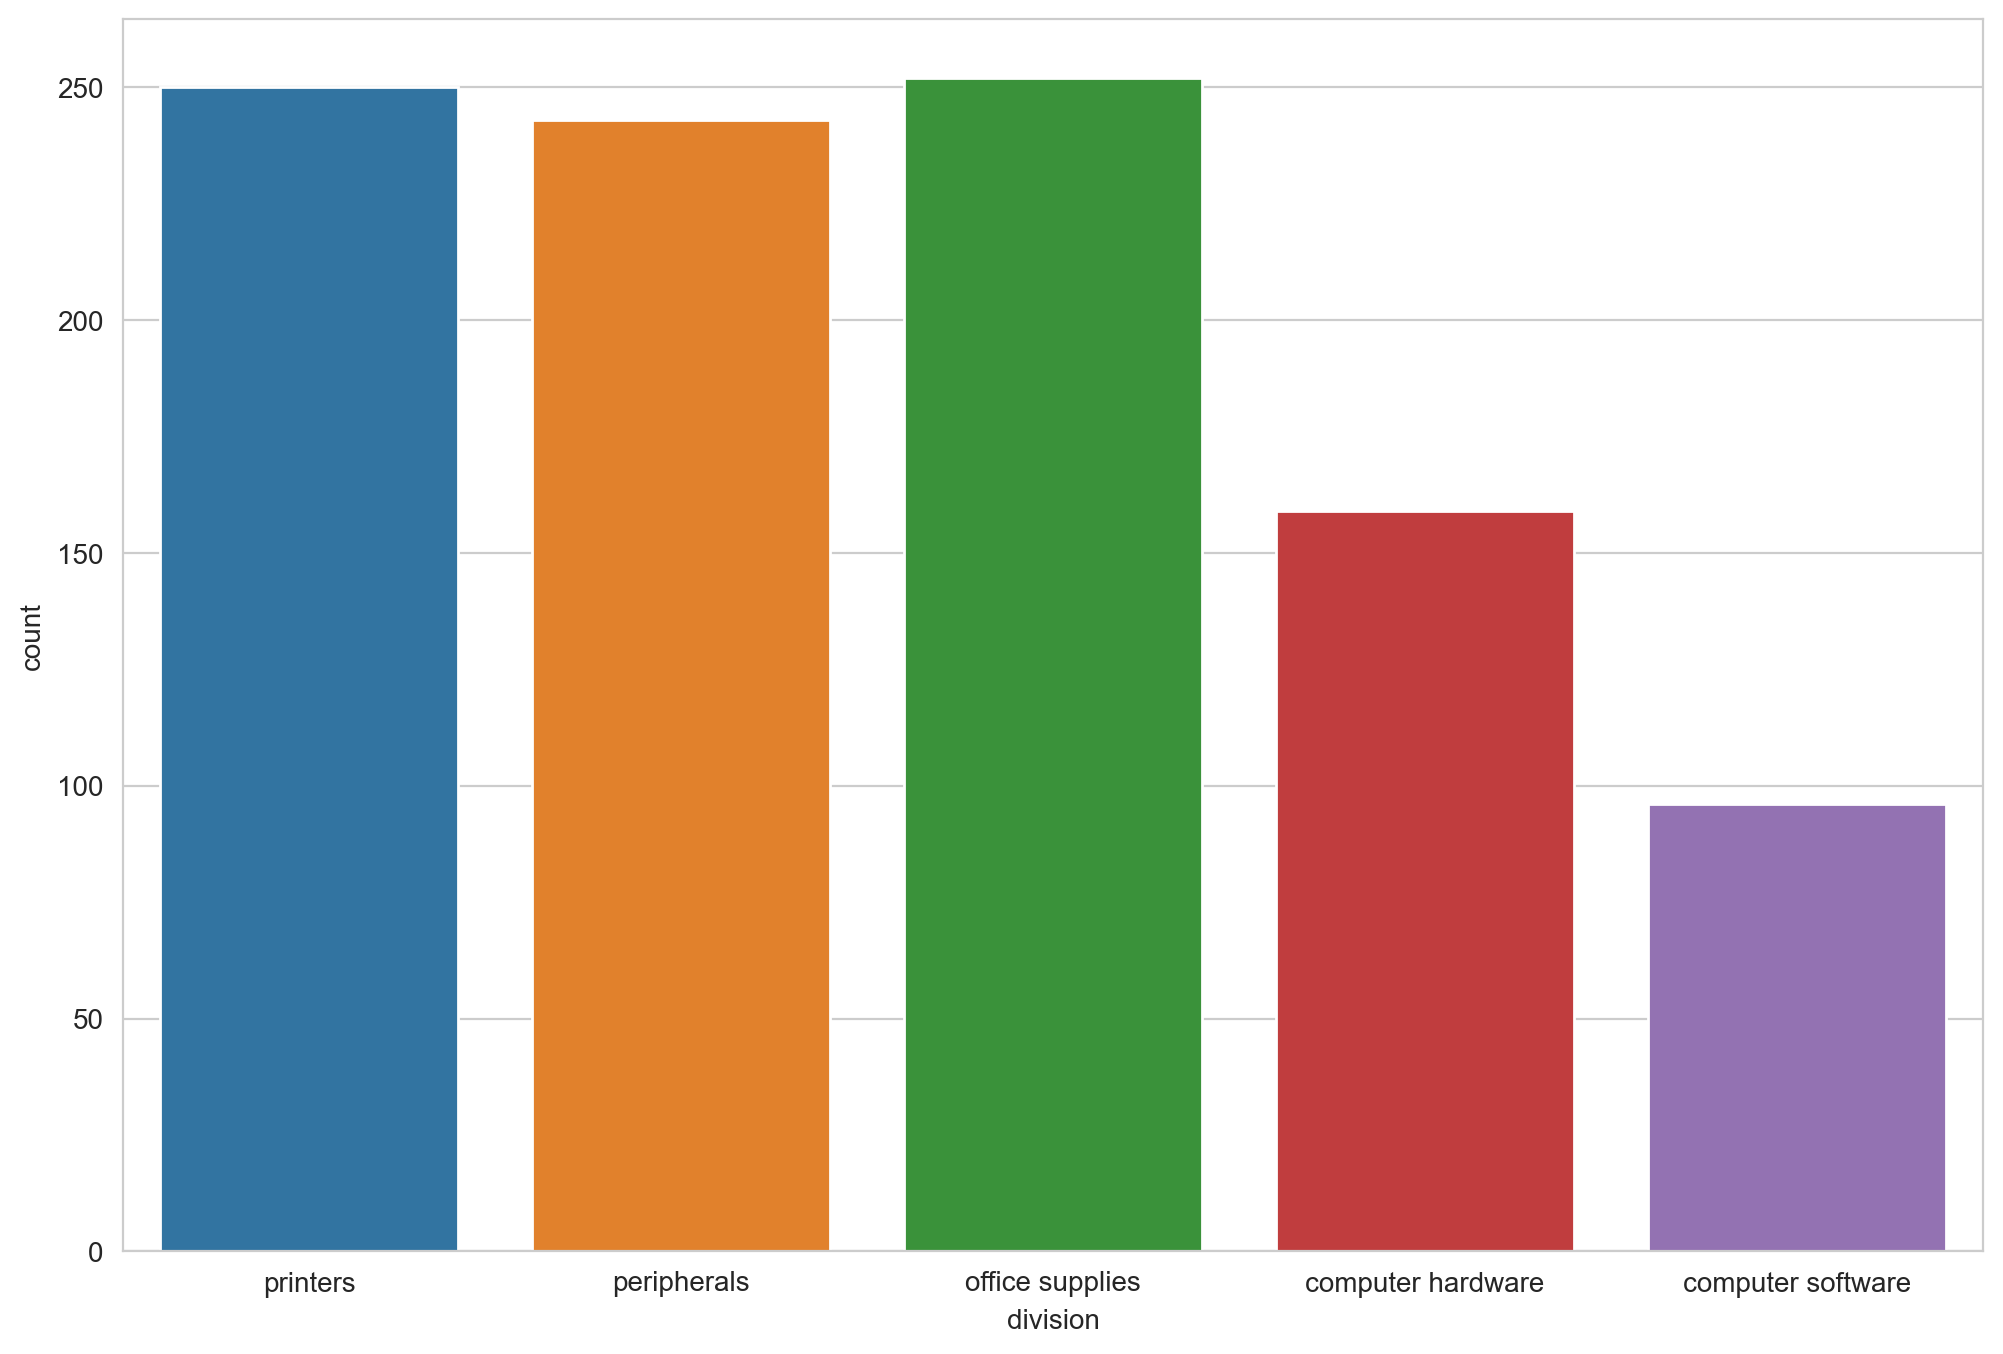

In [22]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='division',hue='division')
plt.show()

*По сути на этом графике мы видим те же результаты, что и при использовании метода value_counts()*

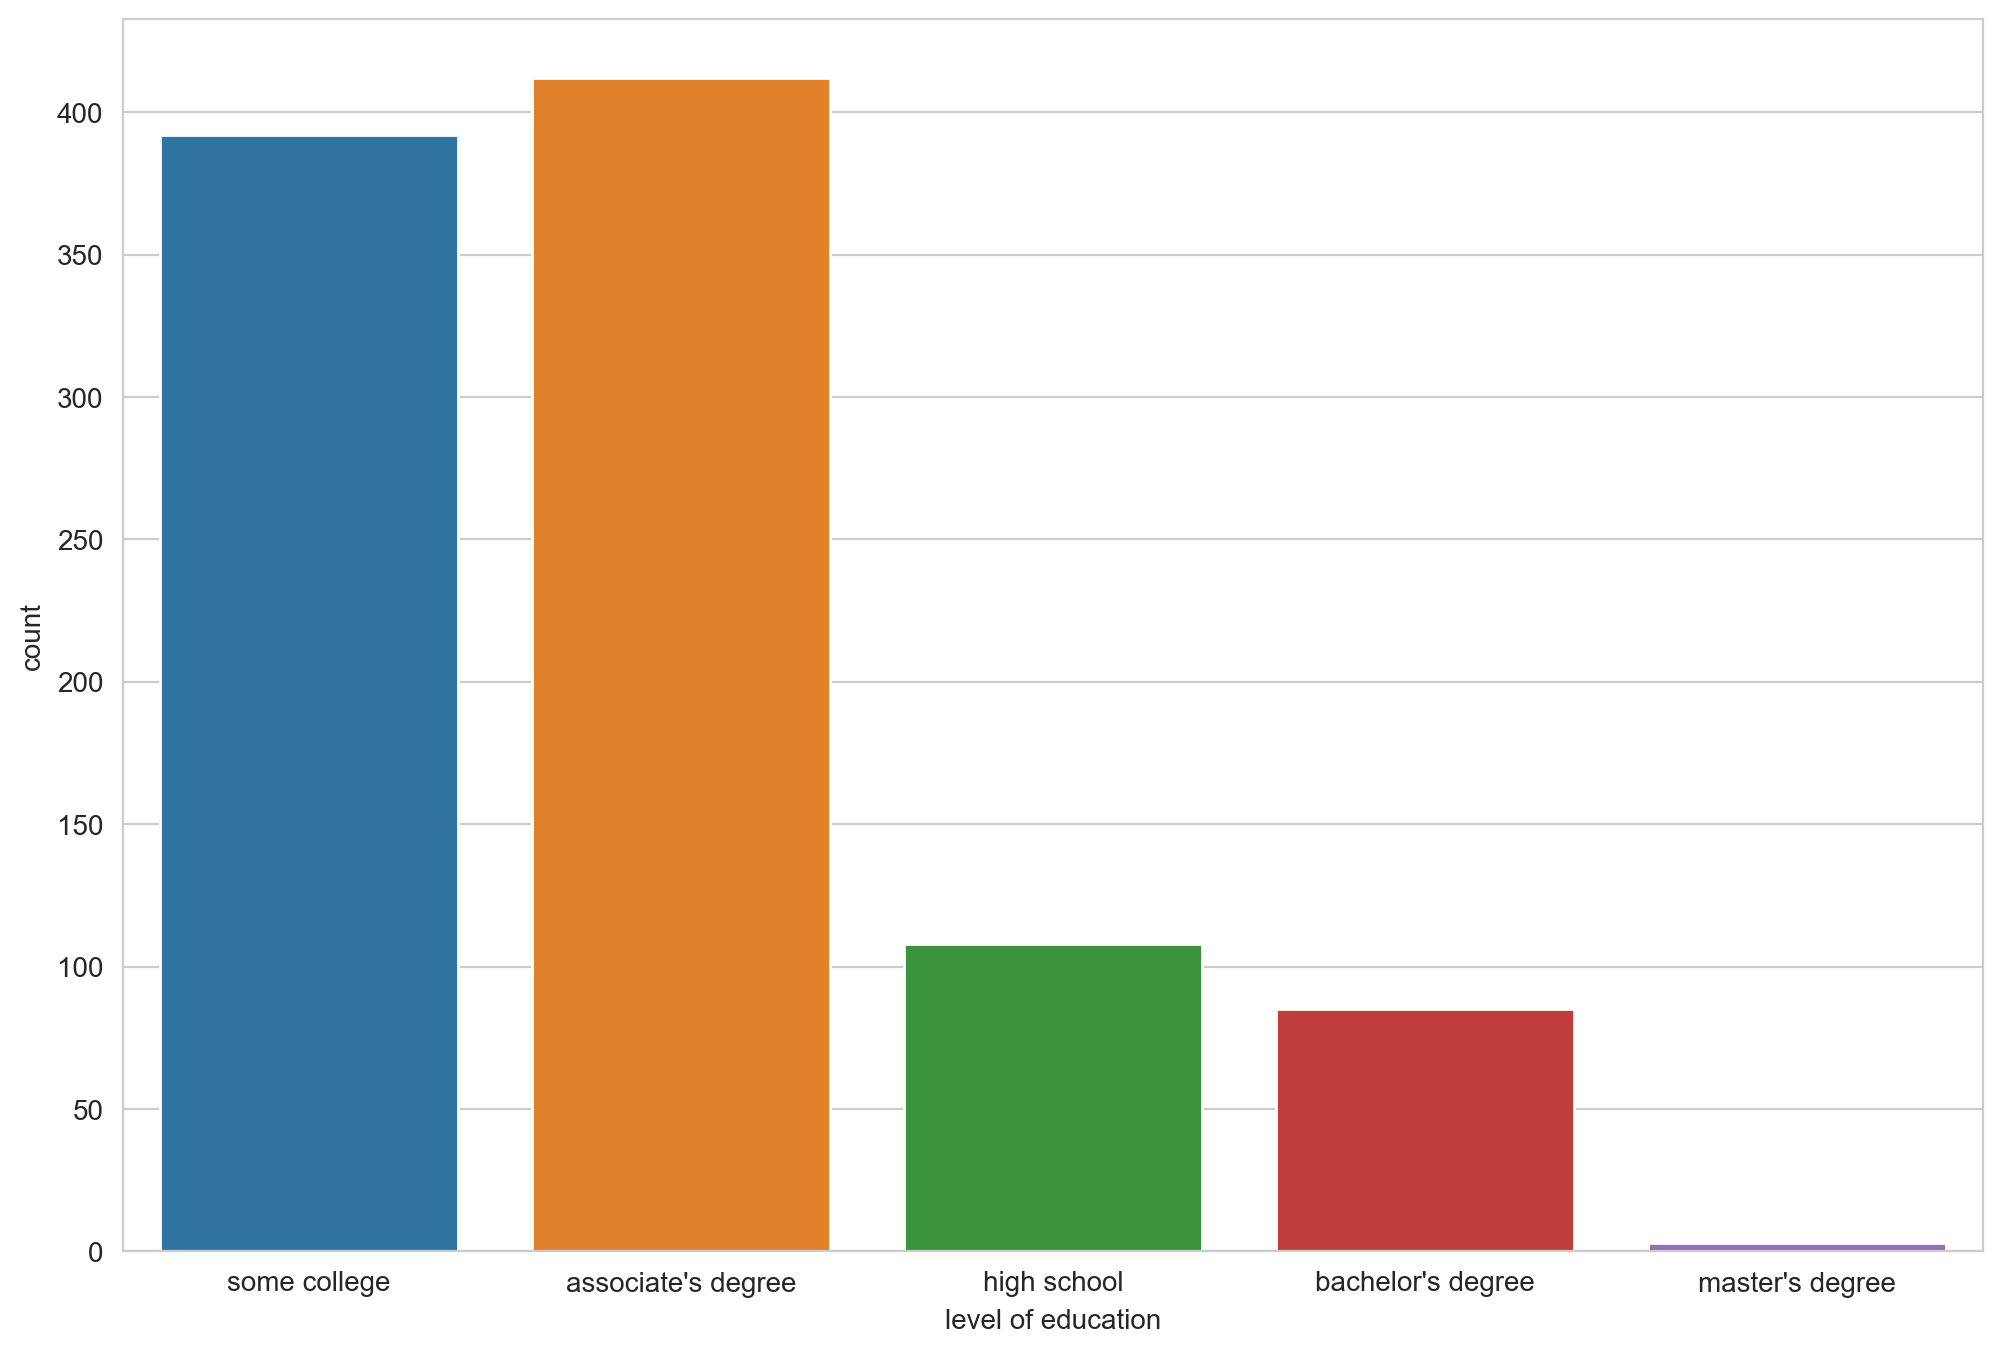

In [25]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='level of education', hue='level of education')
plt.show()

In [27]:
df['level of education'].value_counts()

level of education
associate's degree    412
some college          392
high school           108
bachelor's degree      85
master's degree         3
Name: count, dtype: int64

### Добавляем подкатегории с помощью параметра 'hue'

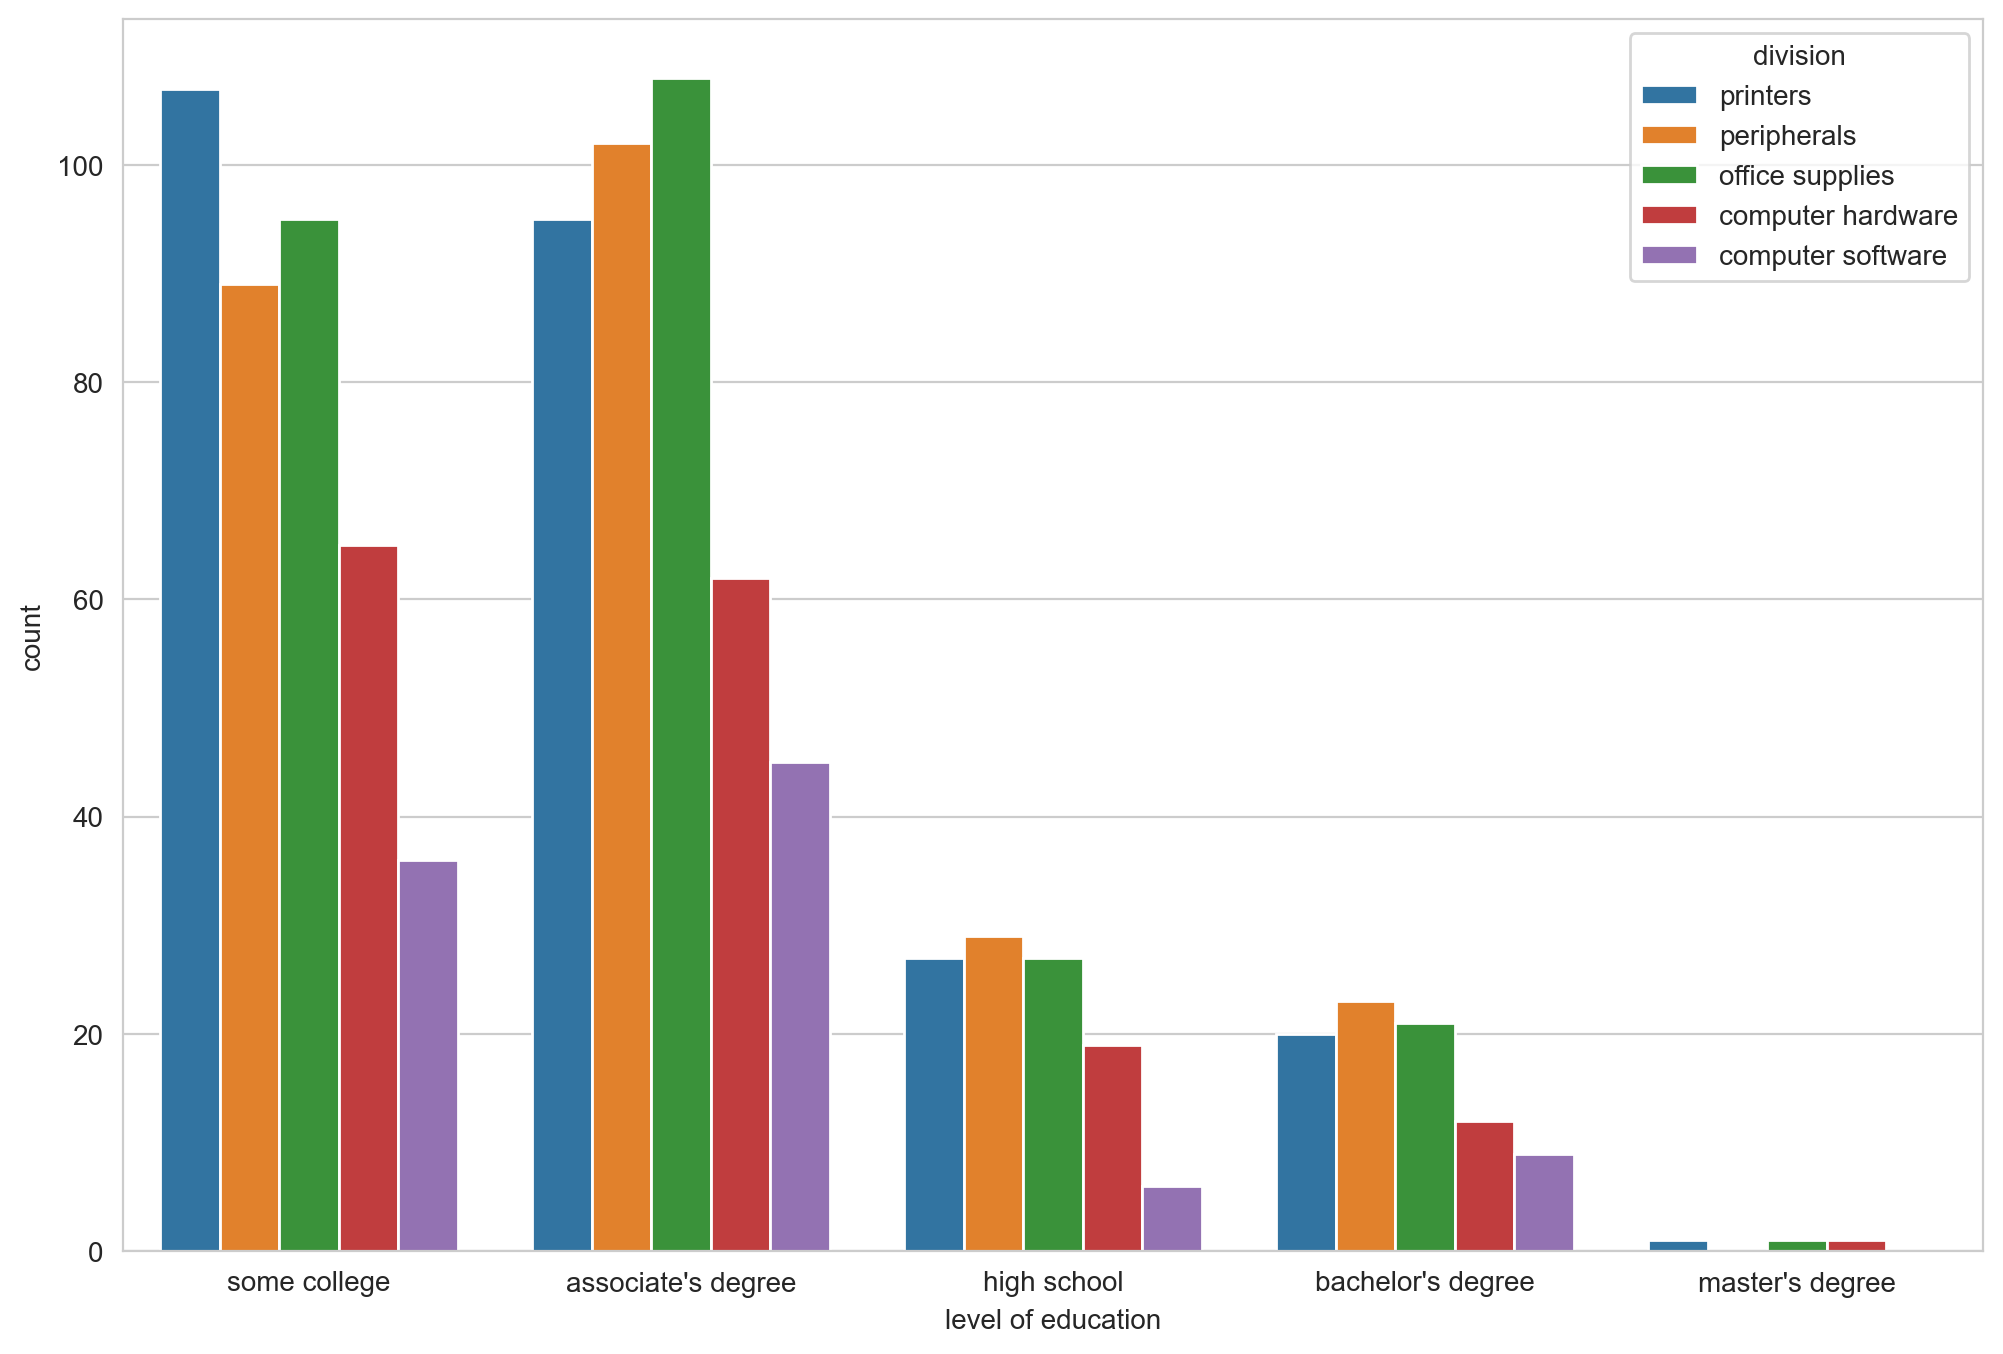

In [30]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='level of education', hue='division')
plt.show()

### Можно отрегулировать цветовую [палитру](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html) графика

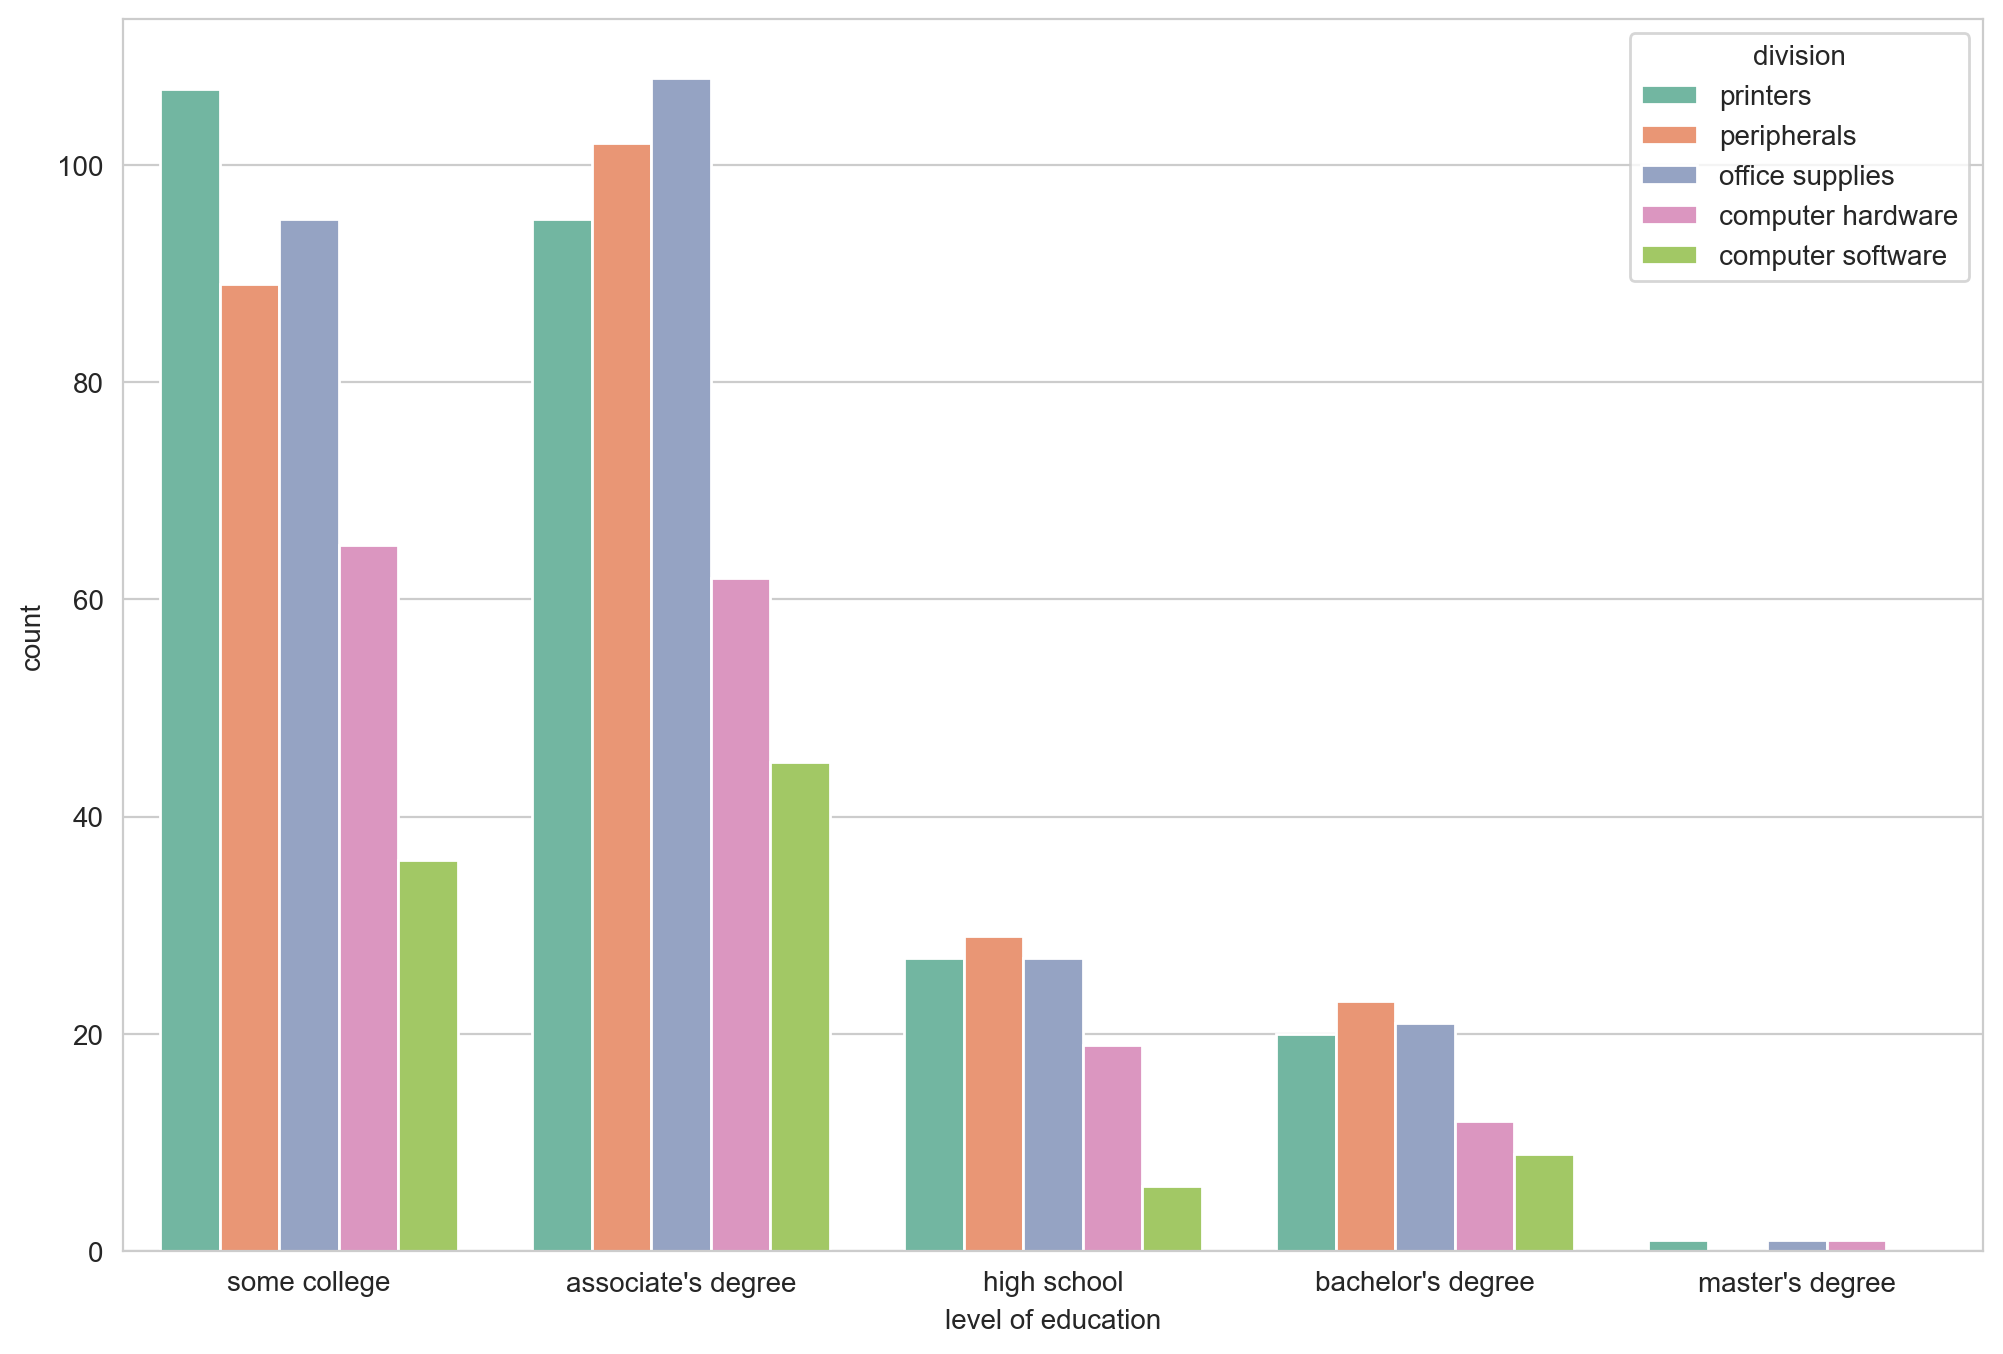

In [33]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='level of education', hue='division', palette='Set2')
plt.show()

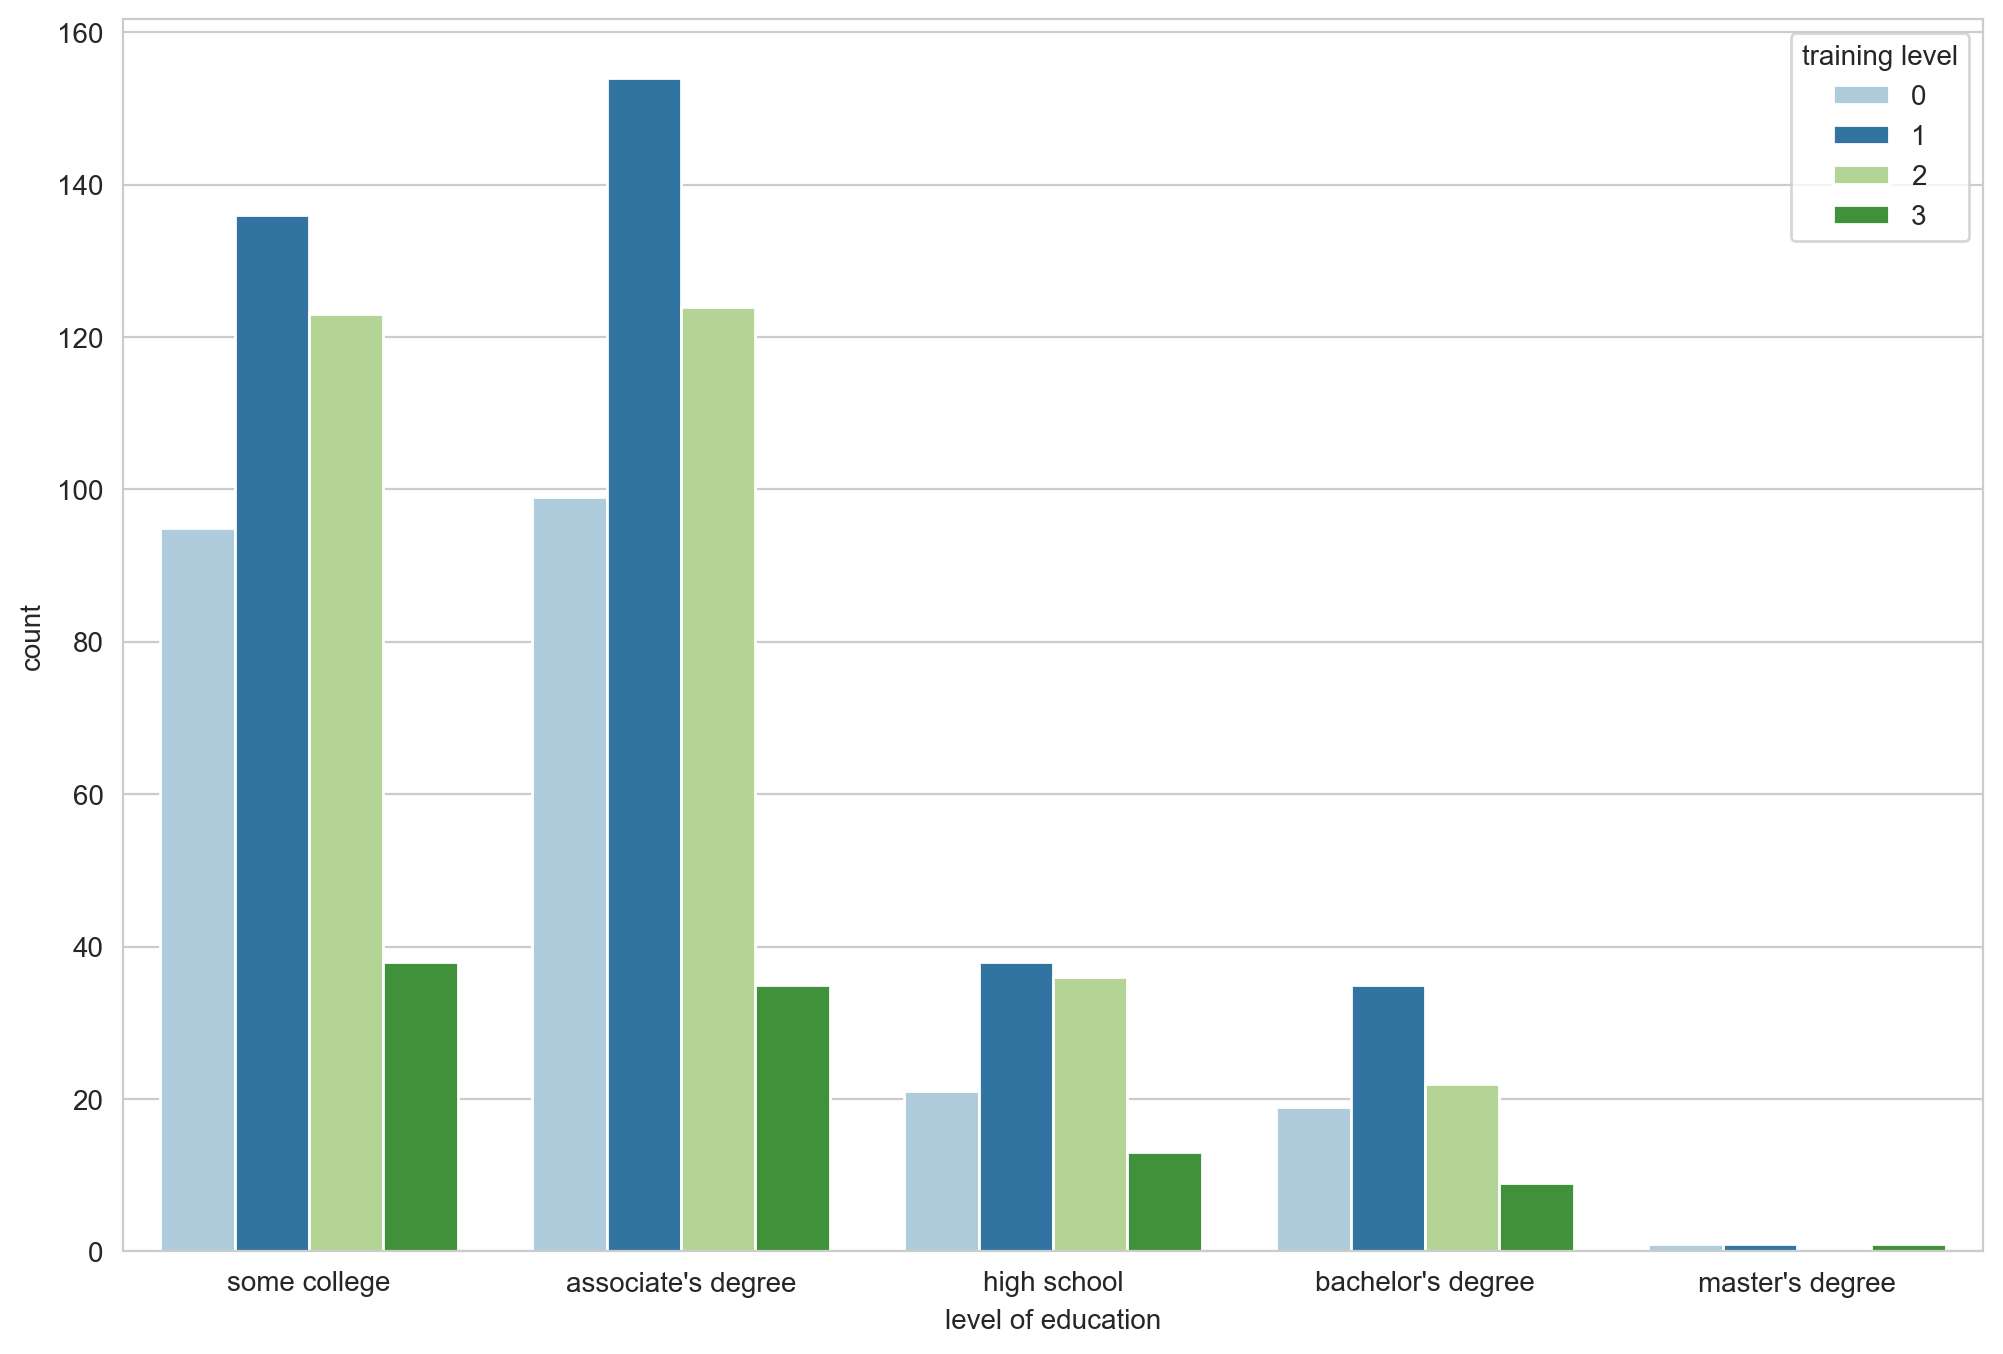

In [36]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='level of education', hue='training level', palette='Paired')
plt.show()

## Метод .barplot()
До этого по умолчанию по оси Y откладывалось количество count, по аналогии с командой **.groupby(x_axis).count()** в Pandas. Но мы также можем добавить некоторую непрерывную переменную по оси Y. 

**Важно:** с такими графиками необходимо быть очень аккуратным: иногда в результате построения таких графиков может показаться, что по оси Y нанесены непрерывные значения, хотя это может быть не так.

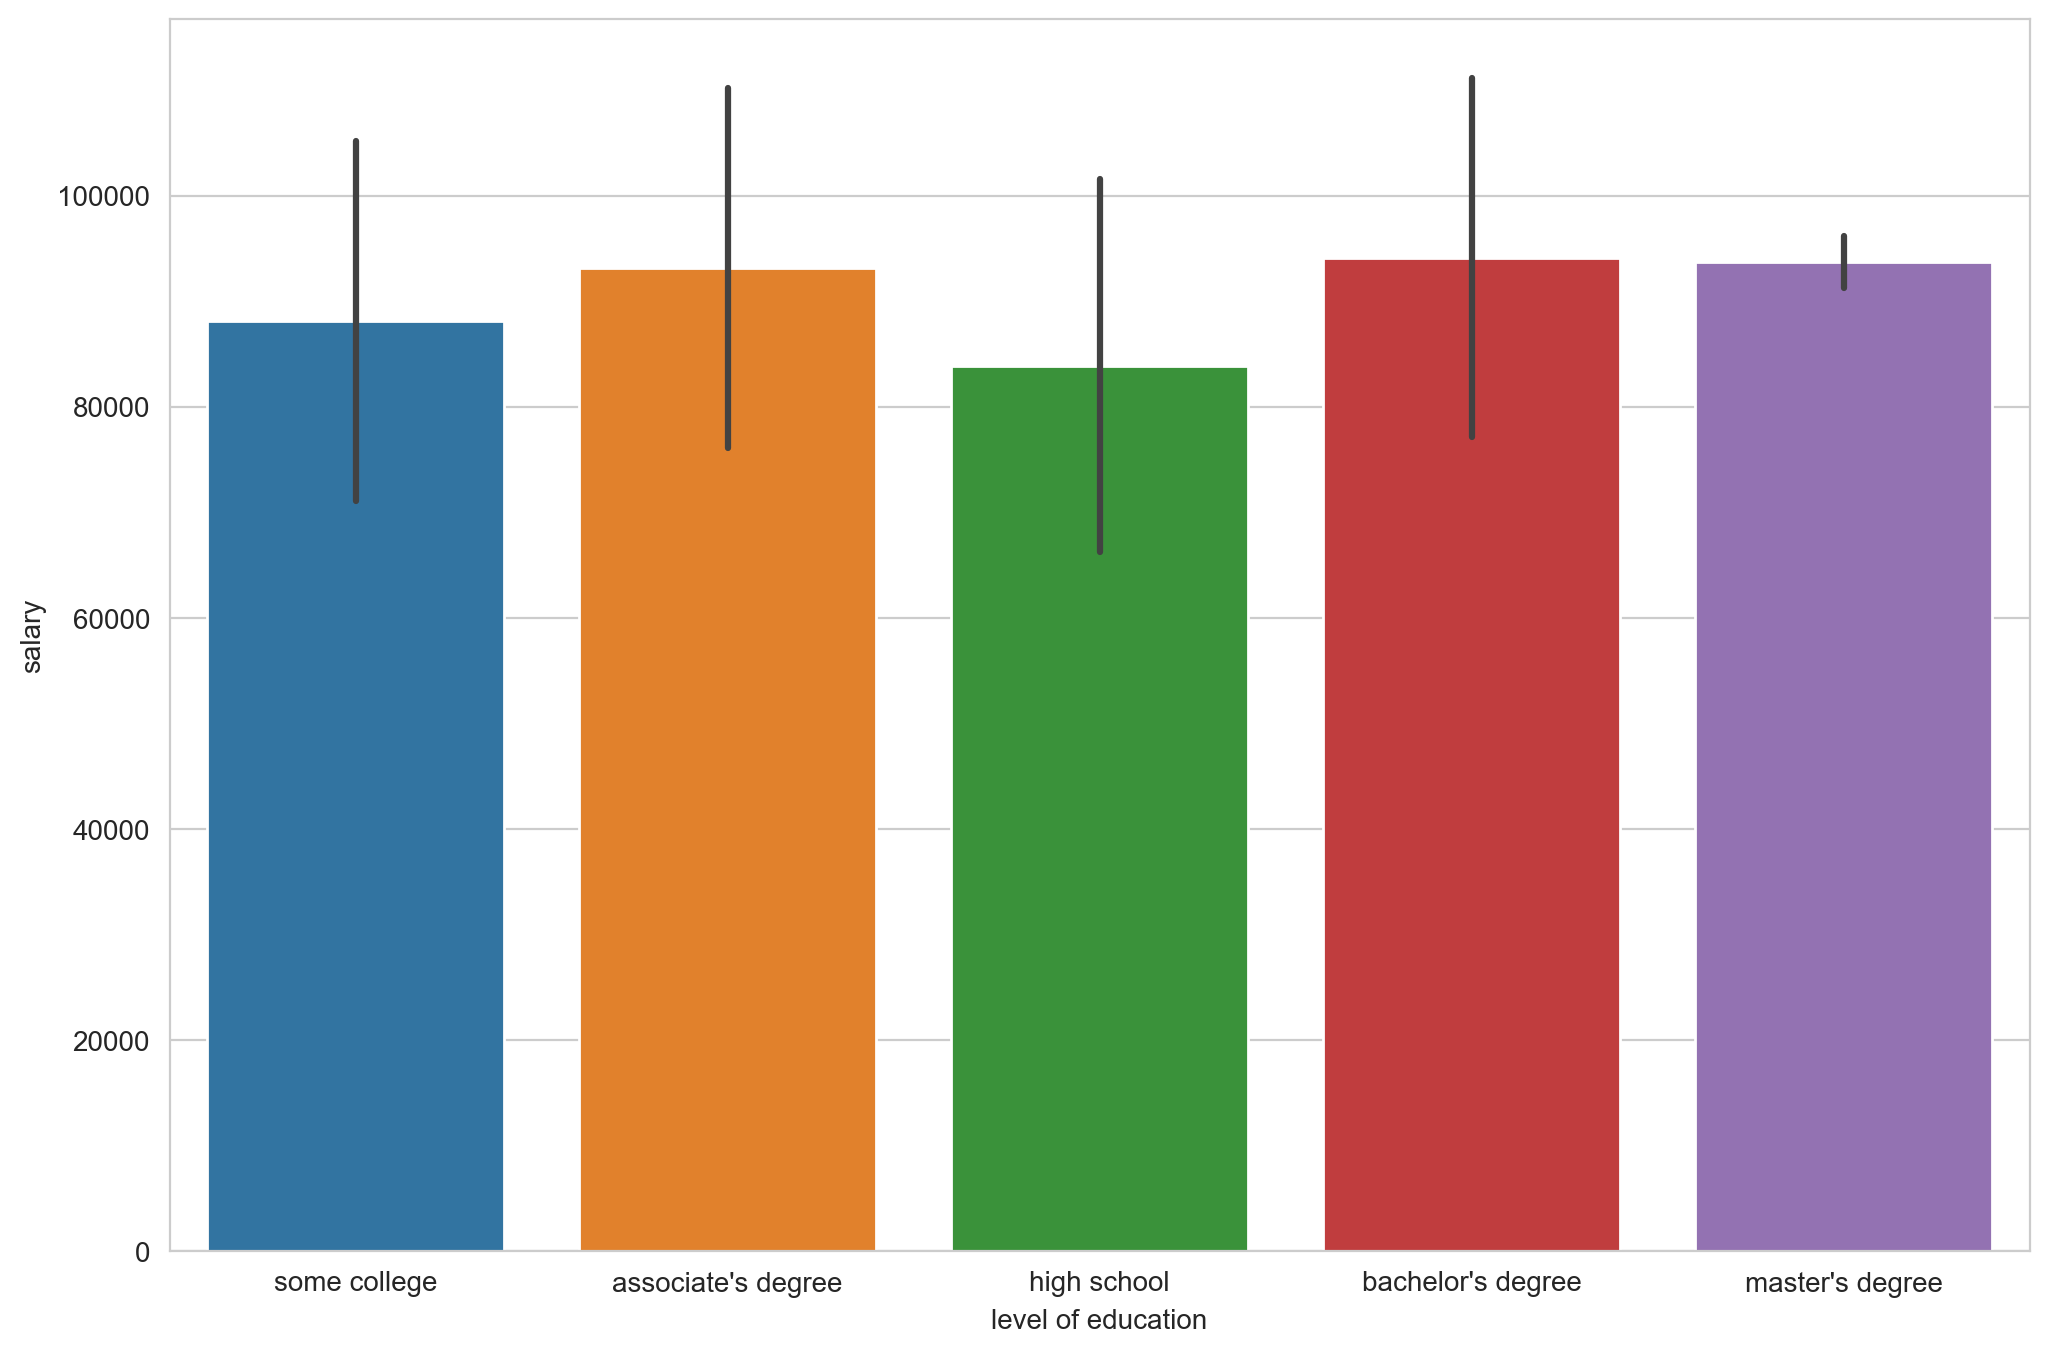

In [48]:
plt.figure(figsize=(12, 8), dpi=200)
# По умолчанию barplot() показывает среднее значение - mean
# Статья о чёрных полосках на столбиках: 
# https://stackoverflow.com/questions/58362473/what-does-black-lines-on-a-seaborn-barplot-mean
sns.barplot(data=df, x='level of education', y='salary', hue='level of education', estimator=np.mean, errorbar='sd')
plt.show()

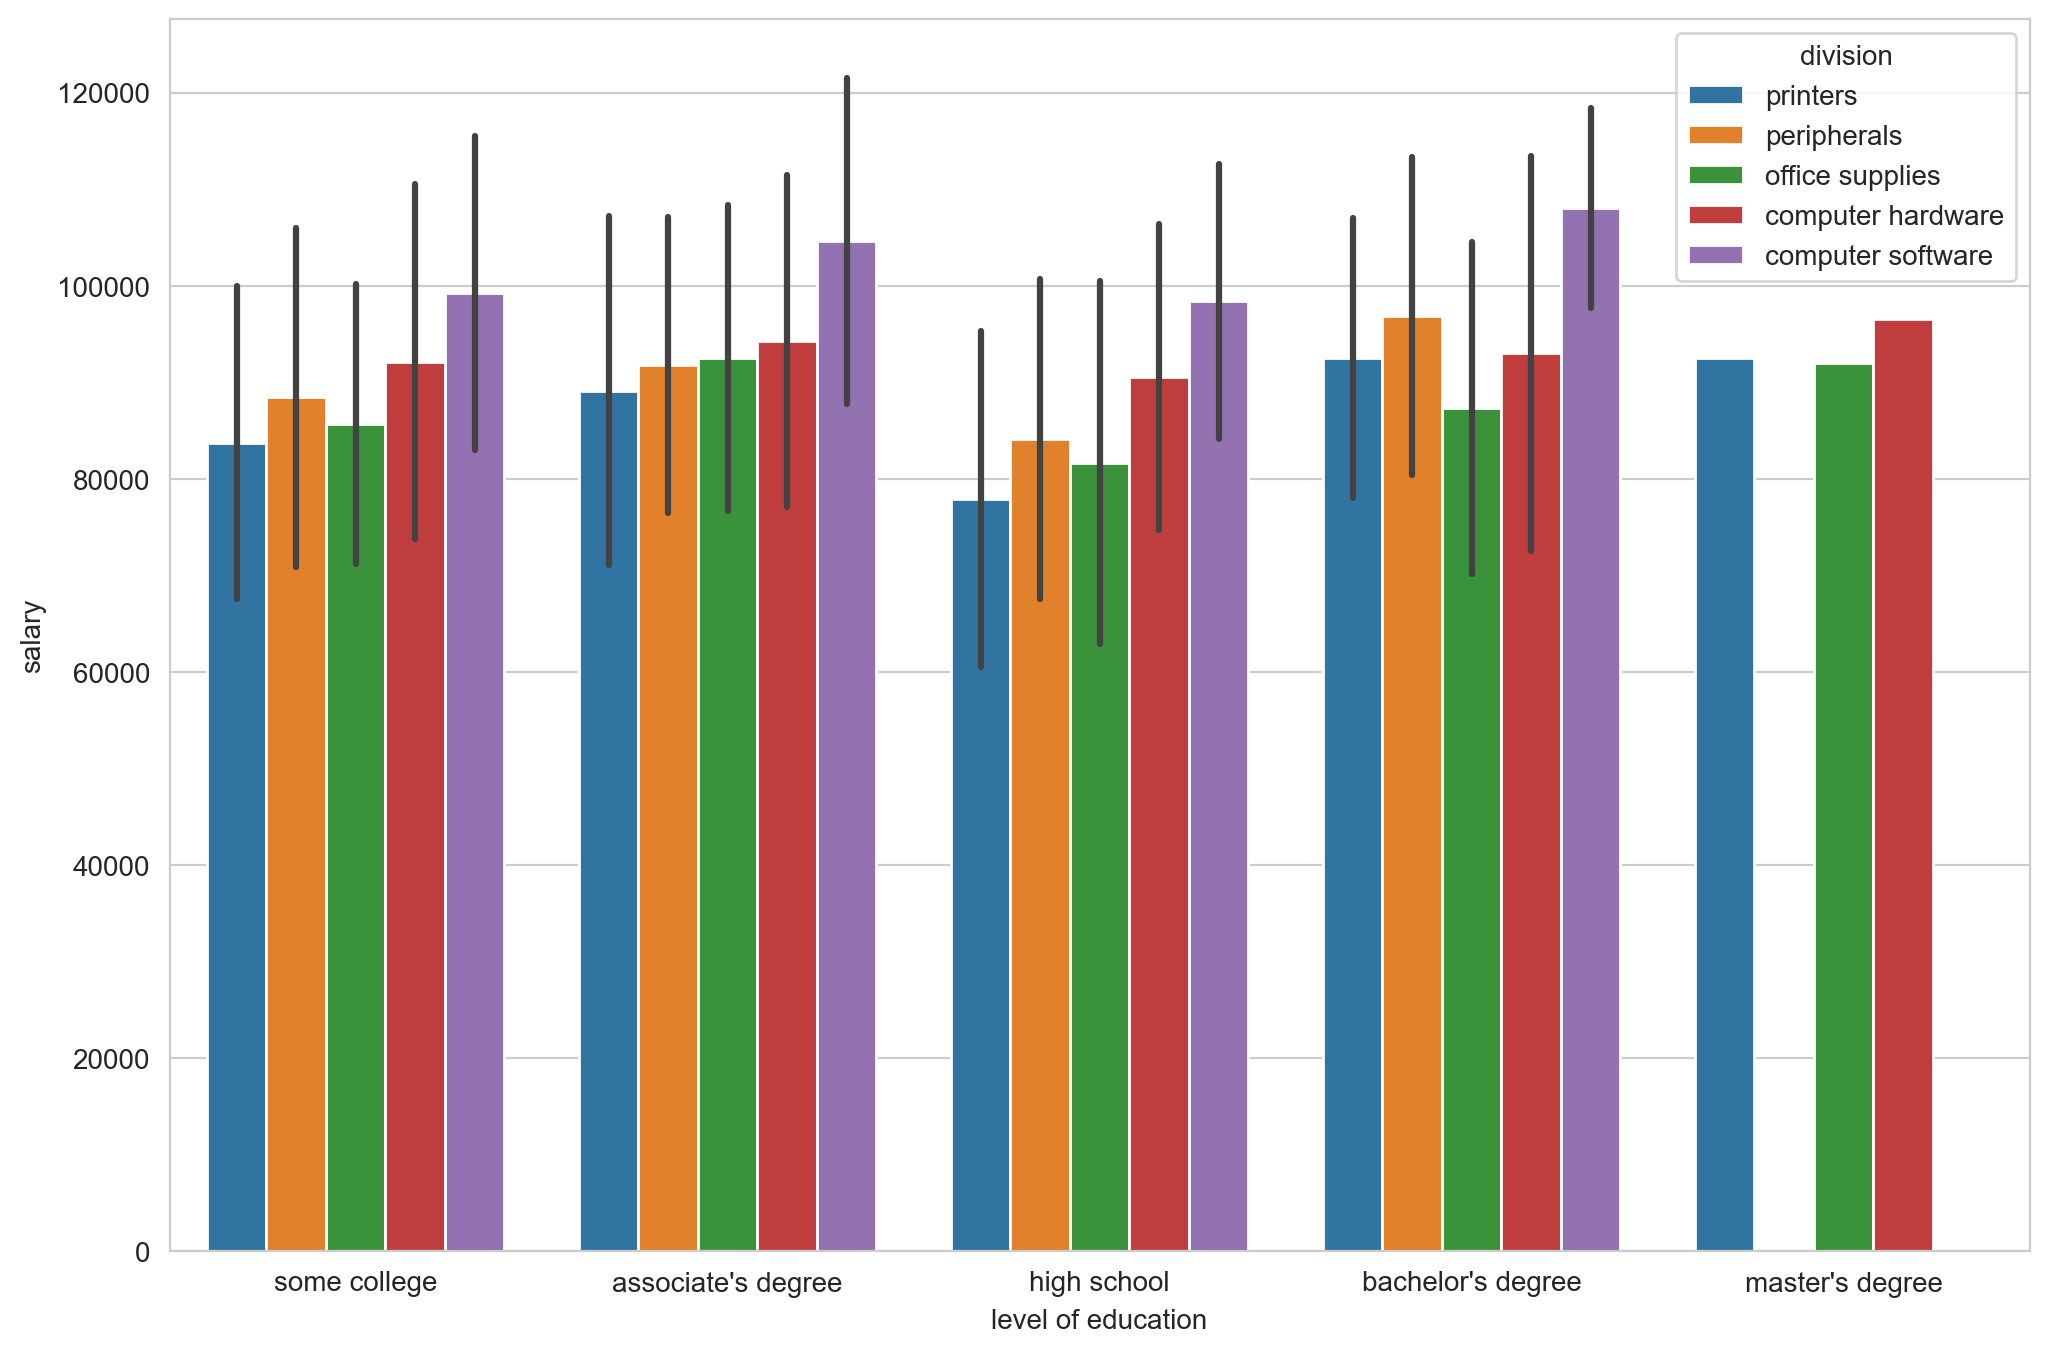

In [50]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=df, x='level of education', y='salary', hue='division', estimator=np.mean, errorbar='sd')
plt.show()

### Переместим легенду в более удачное место

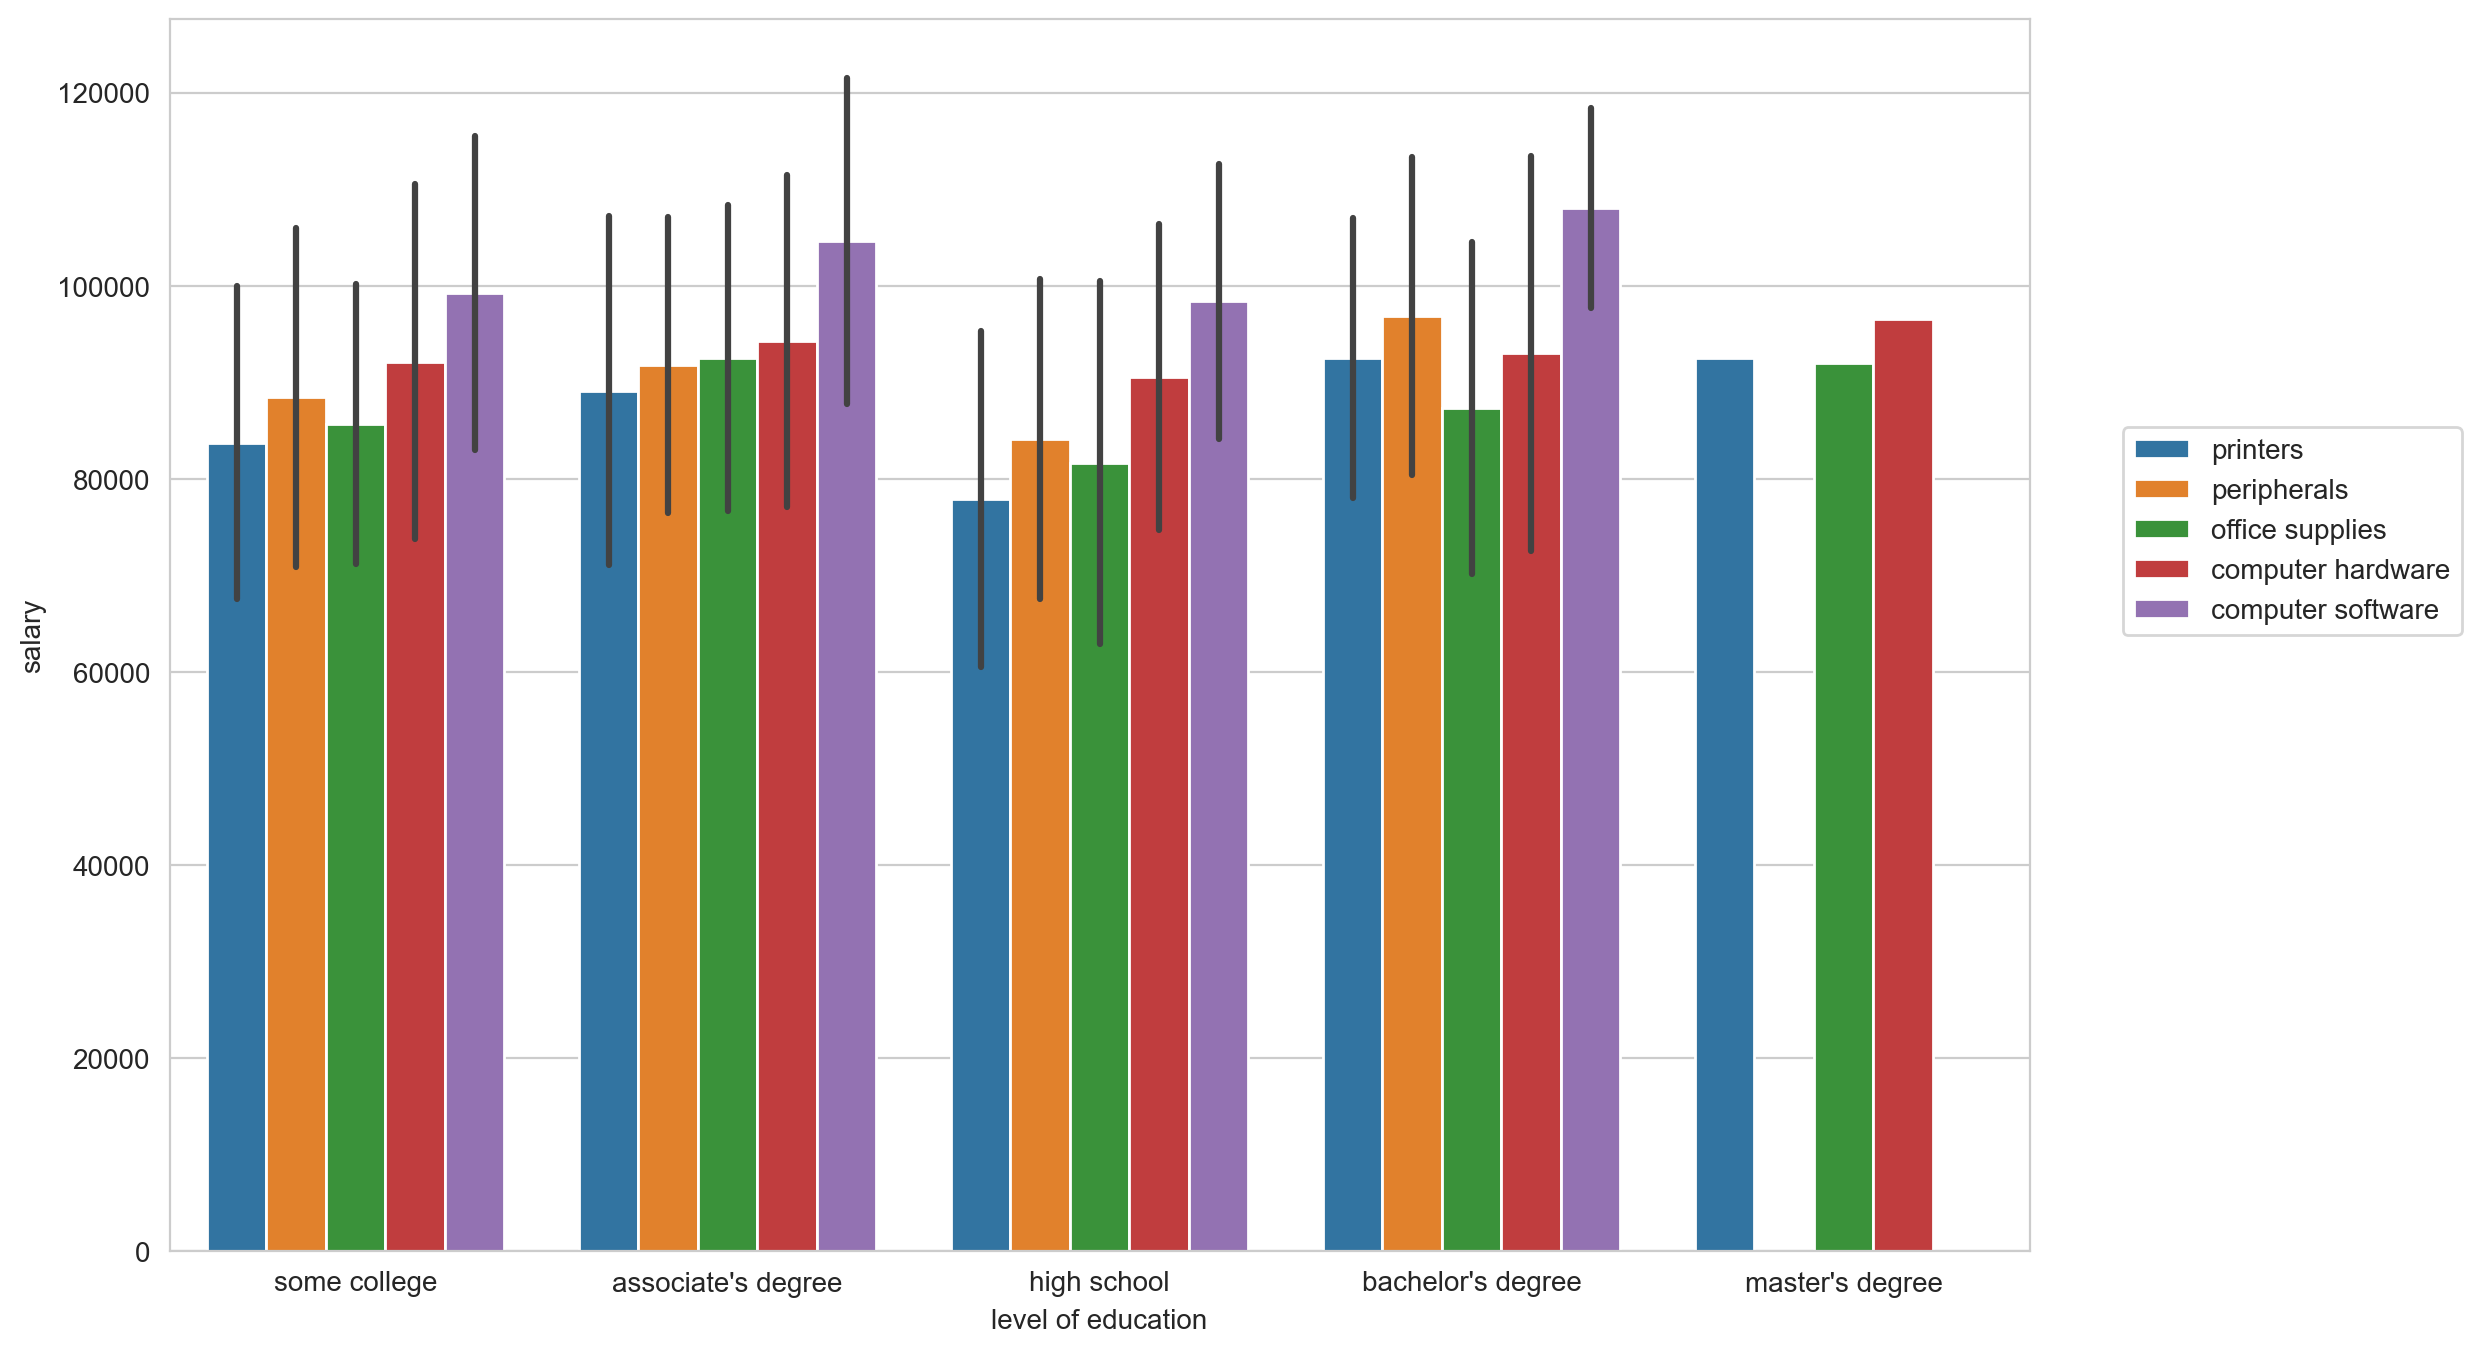

In [55]:
plt.figure(figsize=(12, 8), dpi=200)
sns.barplot(data=df, x='level of education', y='salary', estimator=np.mean, errorbar='sd', hue='division')
plt.legend(loc=(1.05, 0.5))    # Ещё можно использовать bbox_to_anchor 
plt.show()

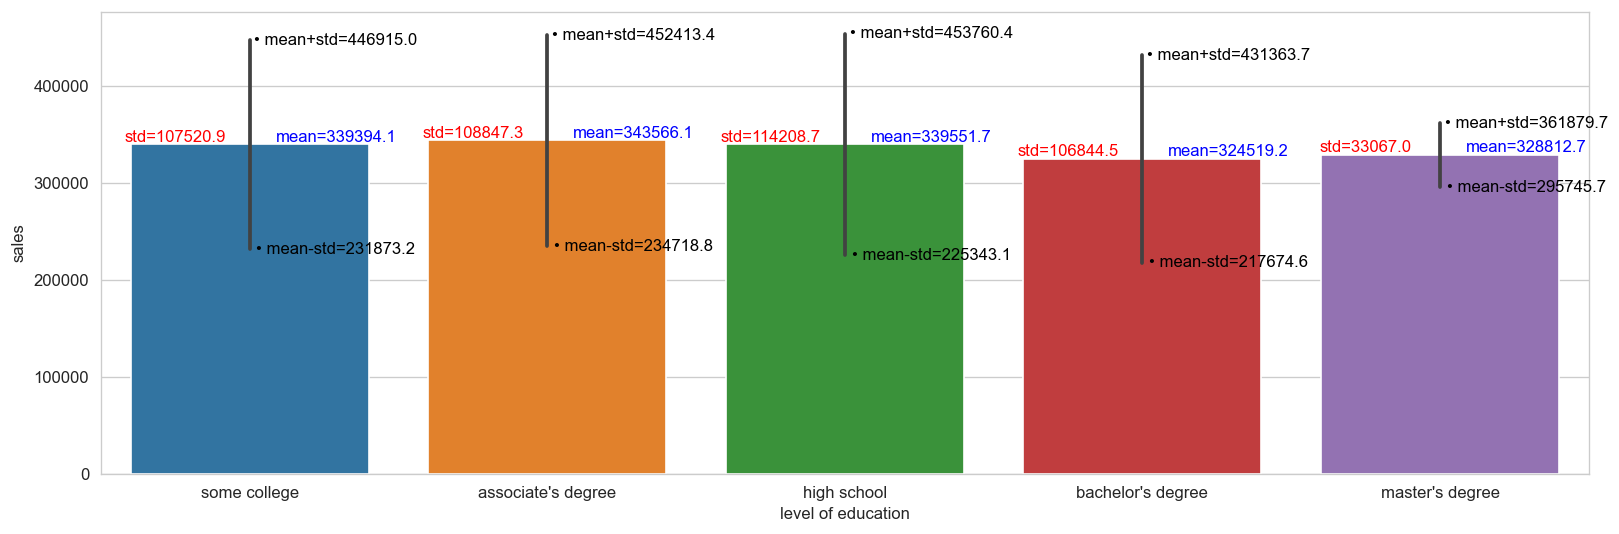


Эти же значения пандасом:

                        mean       std  median+std  median-std
level of education                                            
associate's degree  343566.1  108847.3    452413.4    234718.8
bachelor's degree   324519.2  106844.5    431363.7    217674.6
high school         339551.7  114208.7    453760.4    225343.1
master's degree     328812.7   33067.0    361879.7    295745.7
some college        339394.1  107520.9    446915.0    231873.2


In [62]:
plt.figure(figsize=(16,5), dpi = 120)
sns.set_style(style='whitegrid')
ax = sns.barplot(data=df, x='level of education', y='sales', hue='level of education', estimator = np.mean, errorbar=("sd",1))

#получаем значения и координаты для высот столбцов
for bar in ax.patches: #.........................двигаемся по категориям
    #получаем значения и координаты для высот столбцов(они называются барами)
    height = bar.get_height() #.................получаем высоту столбцов
    x_pos = bar.get_x() + bar.get_width() / 2 #..получаем координату по x левого края и прибавляем половишу ширины (для этого примера получаем 0,1,2)

    #не знаю как получить значения errorbar из графика, посчитаем стандартное отклонение сами
    mean = height
    caterory_name = df['level of education'].unique()[int(x_pos)] # получаем название категории, x_pos подходит вкачестве
    std = df[ df['level of education'] == caterory_name]['sales'].std()
    #выводим среднее
    plt.text(x=x_pos+0.29, y=mean+0.1, s='mean='+str(round(mean,1)), ha='center', va='bottom', color='b')
    #выводим стандартное отклонение
    plt.text(x=x_pos-0.25, y=mean+0.1, s='std='+str(round(std,1)), ha='center', va='bottom', color='r') # всего
    plt.text(x=x_pos+0.29, y=mean+std, s='• mean+std='+str(round(mean+std,1)), ha='center', va='center', color='black') # всего
    plt.text(x=x_pos+0.29, y=mean-std, s='• mean-std='+str(round(mean-std,1)), ha='center', va='center', color='black') # всего

plt.show()

print("\nЭти же значения пандасом:\n")
g = df.groupby(by = 'level of education')['sales']
df2 = g.agg(['mean', "std"])
df2['median+std'] = df2['mean'] + df2['std']
df2['median-std'] = df2['mean'] - df2['std']
df2 = round(df2,1)
print(df2)

---